# Final Project PHYS265

Name: David Morejon

Date: 5/18/2025

To run this jupyter notebook, ensure your environment is set to an anaconda 3 environment and then run all cells.

To run this jupyter notebook, ensure your environment is set to anaconda 3 and then run all cells.

In [1]:
!pip install reproject
!pip install astropy
!pip install astropy-healpix
!pip install dask
!pip install zarr 
!pip install fsspec



In [2]:
#!pip install "astropy[all]" 
import numpy as np

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('gc_msx_e.fits'))[0]

Text(0.5, 1.0, 'MSX band E')

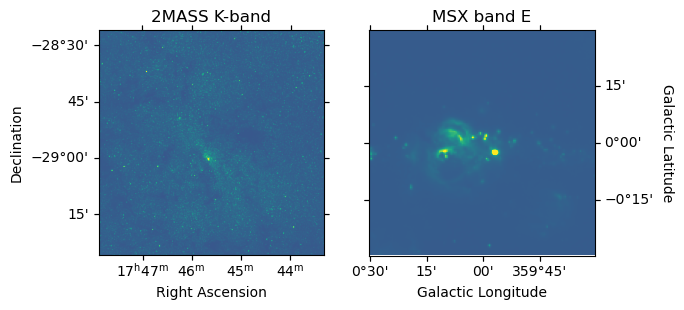

In [3]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS K-band')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')

In [4]:
from reproject import reproject_interp
array, footprint = reproject_interp(hdu2, hdu1.header)

Text(0.5, 1.0, 'MSX band E image footprint')

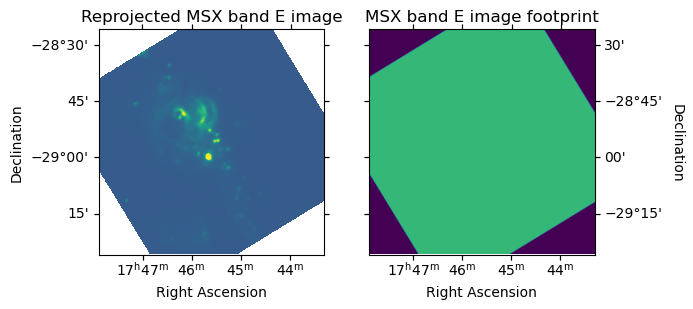

In [5]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected MSX band E image')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('MSX band E image footprint')

In [6]:
fits.writeto('msx_on_2mass_header.fits', array, hdu1.header, overwrite=True)
